# ECON 270A - Problem Set 1

### Simón Ramírez Amaya - 21/03/2023

In [ ]:
# Installing packages
install.packages("multiwayvcov")
install.packages("lmtest")
install.packages("tidyverse")
install.packages("broom")
install.packages("sandwich")
install.packages("hdm")
install.packages("fastDummies")
install.packages("fixest")

In [476]:
# Loading packages
library(multiwayvcov)
library(lmtest)
library(broom)
library(sandwich)
library(hdm)
library(fastDummies)
library(fixest)
library(grf)
library(car)
library(ggplot2)

In [29]:
# Load df
df <- read.csv("data/PS1.csv")

## Part I: Estimating program treatment effects on income

## ------------------------------------------  Question (a) ------------------------------------------------

We estimate the following model by OLS, clustering errors at the village level:

$$  Y^{el}_{i} = \beta_{0} + \beta{1}*treat_{i} + \epsilon_{i}  $$

The estimate of the average spillover effect is positive but not significant at the 10\% level. The estimate of \$44 USD is sizeable, about 14\% of the mean  endline income per capita among households in control villages. 

In [33]:
# OLS estimates without clustering
m_ols <- lm(el_income_pc ~ treat, data = df)
tidy(m_ols, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),319.62144,21.89163,14.600164,3.070096e-45,276.67993,362.5630
treat,44.05007,31.23130,1.410446,1.586155e-01,-17.21165,105.3118


In [46]:
# OLS estimates with clustering
tidy(
    coeftest(
        m_ols, 
        vcov = vcovCL, 
        cluster = df$village_code, 
        type = "HC1"
    ),
    conf.int = TRUE
)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),319.62144,16.19026,19.741591,2.722093e-77,287.86346,351.3794
treat,44.05007,30.06930,1.464952,1.431439e-01,-14.93233,103.0325


In [22]:
mean(df[which(df$treat==0),]$el_income_pc)

[1] 319.6214

## ------------------------------------------- Question (b) ------------------------------------------------

We estimate the following model by OLS, clustering errors at the village level:

$$  Y^{el}_{i} = \beta_{0} + \beta{1}*treat_{i} + \mathbf{X}^{t}\mathbf{\Psi} +  \epsilon_{i}  $$

The results do not change meaningfully. The estimate of the average spillover effect controlling for the baseline characteristics has the same sign, similar magnitude and statistical significance.

In [52]:
# OLS estimates without clustering
fm = "el_income_pc ~ treat + bl_hhsize + bl_widow + bl_has_children + bl_has_elder + bl_own_livestock + bl_own_land + bl_own_tv_radio + bl_meals_eaten + bl_emp_self + bl_emp_wage"

m_ols <- lm(
    fm,
    data = df
)
tidy(m_ols, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),538.2653040,94.124346,5.71866184,1.295513e-08,353.634797,722.89581
treat,49.1105648,30.724615,1.59841105,1.101638e-01,-11.157597,109.37873
bl_hhsize,-27.0462340,8.451018,-3.20035229,1.401562e-03,-43.623408,-10.46906
bl_widow,-160.6760094,35.095583,-4.57824018,5.079577e-06,-229.518085,-91.83393
bl_has_children,-74.5885568,46.995987,-1.58712610,1.126965e-01,-166.773982,17.59687
bl_has_elder,-150.4453571,36.332573,-4.14078452,3.655553e-05,-221.713862,-79.17685
bl_own_livestock,53.2711893,31.849070,1.67261367,9.461359e-02,-9.202657,115.74504
bl_own_land,-50.3495275,58.838497,-0.85572422,3.922881e-01,-165.764743,65.06569
bl_own_tv_radio,66.1918318,34.873257,1.89806855,5.788041e-02,-2.214137,134.59780


In [53]:
# OLS estimates with clustering
tidy(
    coeftest(
        m_ols, 
        vcov = vcovCL, 
        cluster = df$village_code, 
        type = "HC1"
    ),
    conf.int = TRUE
)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),538.2653040,93.449636,5.7599508,1.020622e-08,354.95828,721.572328
treat,49.1105648,31.010557,1.5836724,1.134808e-01,-11.71849,109.939619
bl_hhsize,-27.0462340,9.143671,-2.9579184,3.146120e-03,-44.98209,-9.110378
bl_widow,-160.6760094,30.699076,-5.2339038,1.896787e-07,-220.89407,-100.457945
bl_has_children,-74.5885568,48.788736,-1.5288069,1.265249e-01,-170.29057,21.113454
bl_has_elder,-150.4453571,30.454340,-4.9400301,8.693062e-07,-210.18336,-90.707356
bl_own_livestock,53.2711893,33.465132,1.5918416,1.116327e-01,-12.37266,118.915037
bl_own_land,-50.3495275,70.398524,-0.7152071,4.745933e-01,-188.44042,87.741368
bl_own_tv_radio,66.1918318,25.550891,2.5905880,9.674830e-03,16.07224,116.311425


## -------------------------------------------Question (c)---------------------------------------------------

We use the hdm package by Splinder, Chernozhukov, Hansen and Bach (2019) to estimate the average spillover effect using the post-double-selection method in Belloni et al (2014). 

As expected, the first lasso step fails to find non-zero coefficients for predicting the random treatment. The second lasso step suggests that the widow and the elderly indicator along with a few of the interactions of these variables with household size are useful in predicting the endline income per capita. As expected, the signs of these non-zero coefficients are negative. There are no meaningful changes in the estimate of the average spillover effect. The sign and magnitude are the same and the statistical significance is only marginally affected. 

In [381]:
X = as.matrix(select(
    df,
    treat,  
    bl_hhsize,
    bl_widow,
    bl_has_children,
    bl_has_elder,
    bl_own_livestock,
    bl_own_land,
    bl_own_tv_radio,
    bl_meals_eaten,
    bl_emp_self,
    bl_emp_wage,
))

y = as.matrix(select(
    df,
    el_income_pc
))

d = as.matrix(select(
    df,
    treat
))

#lasso_d = rlasso(y=d,x=X[,-1])
#lasso_y = rlasso(y=y,x=X[,-1])
#lasso_effect = rlassoEffect(x=X[,-1],d=d,y=y,method="double selection")
#print(summary(lasso_effect))

In [382]:
for(name in colnames(X)[-(1:2)]){
    interaction = i(X[,"bl_hhsize"],X[,name],ref=TRUE)
    colnames(interaction) = lapply(colnames(interaction), paste0, name)
    X = cbind(X,interaction)
}

In [383]:
lasso_d = rlasso(y=d,x=X[,-1])
lasso_y = rlasso(y=y,x=X[,-1])

In [407]:
print(summary(lasso_d),all=FALSE)


Call:
rlasso.default(x = X[, -1], y = d)

Post-Lasso Estimation:  TRUE 

Total number of variables: 127
Number of selected variables: 0 

Residuals: 
    Min      1Q  Median      3Q     Max 
-0.4913 -0.4913 -0.4913  0.5087  0.5087 

                   Estimate
intercept                 0
bl_hhsize                 0
bl_widow                  0
bl_has_children           0
bl_has_elder              0
bl_own_livestock          0
bl_own_land               0
bl_own_tv_radio           0
bl_meals_eaten            0
bl_emp_self               0
bl_emp_wage               0
2bl_widow                 0
3bl_widow                 0
4bl_widow                 0
5bl_widow                 0
6bl_widow                 0
7bl_widow                 0
8bl_widow                 0
9bl_widow                 0
10bl_widow                0
11bl_widow                0
12bl_widow                0
13bl_widow                0
14bl_widow                0
2bl_has_children          0
3bl_has_children          0
4bl_has_ch

In [385]:
print(summary(lasso_y),all=FALSE)


Call:
rlasso.default(x = X[, -1], y = y)

Post-Lasso Estimation:  TRUE 

Total number of variables: 127
Number of selected variables: 7 

Residuals: 
     Min       1Q   Median       3Q      Max 
 -428.99  -268.20  -141.01    29.38 12322.07 

                   Estimate
(Intercept)          429.39
bl_hhsize              0.00
bl_widow            -142.00
bl_has_children        0.00
bl_has_elder           0.00
bl_own_livestock       0.00
bl_own_land            0.00
bl_own_tv_radio        0.00
bl_meals_eaten         0.00
bl_emp_self            0.00
bl_emp_wage            0.00
2bl_widow              0.00
3bl_widow              0.00
4bl_widow            -82.03
5bl_widow              0.00
6bl_widow              0.00
7bl_widow              0.00
8bl_widow              0.00
9bl_widow              0.00
10bl_widow             0.00
11bl_widow             0.00
12bl_widow             0.00
13bl_widow             0.00
14bl_widow             0.00
2bl_has_children       0.00
3bl_has_children       0.00


In [386]:
lasso_effect = rlassoEffect(x=X[,-1],d=d,y=y,method="double selection")
print(summary(lasso_effect))

[1] "Estimates and significance testing of the effect of target variables"
      Estimate. Std. Error t value Pr(>|t|)
treat     49.96      31.41    1.59    0.112




## Part II: Predicting baseline income

## -------------------------------------------Question (d)---------------------------------------------------

The covariates that are statistically significantly related to baseline income per capita are household size (-), children indicator (-), elder indicator (-), livestock (+), self employment (+) and wage employment (+). The distribution of the predicted values coming from the OLS model is very different from the observed distribution. First, some observations are predicted as taking negative values, while the observed distribution is obviously censored at 0. Second, the observed distribution is heavily right skewed, while the predicted values are not obviously skewed to the left or right. As a consequence the min, max, sd and median of the distributions are not similar. 

In [452]:
X_train = X[which(!is.na(df$bl_income_pc)),]
y_train = df[which(!is.na(df$bl_income_pc)),]$bl_income_pc
X_pred = X[which(is.na(df$bl_income_pc)),]

In [453]:
m_ols = lm(y_train ~ .,as.data.frame(X_train[,2:11]))
print(summary(m_ols))


Call:
lm(formula = y_train ~ ., data = as.data.frame(X_train[, 2:11]))

Residuals:
    Min      1Q  Median      3Q     Max 
-322.20  -97.92  -24.70   37.52 2189.32 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       238.49641   39.76964   5.997 2.82e-09 ***
bl_hhsize         -23.82774    3.55706  -6.699 3.52e-11 ***
bl_widow            0.09559   14.46631   0.007   0.9947    
bl_has_children  -108.81448   19.77068  -5.504 4.73e-08 ***
bl_has_elder      -37.79041   15.33602  -2.464   0.0139 *  
bl_own_livestock   67.59355   13.15386   5.139 3.33e-07 ***
bl_own_land        -5.48349   25.62086  -0.214   0.8306    
bl_own_tv_radio    16.59367   14.48431   1.146   0.2522    
bl_meals_eaten     14.49794    9.75899   1.486   0.1377    
bl_emp_self       105.81852   14.30719   7.396 2.99e-13 ***
bl_emp_wage       128.70955   16.09096   7.999 3.49e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 202.2 

In [454]:
y_pred_ols = predict(object=m_ols,new=as.data.frame(X_pred[,2:11]))

In [455]:
summary(as.matrix(y_pred_ols))

       V1         
 Min.   :-123.41  
 1st Qu.:  80.48  
 Median : 164.85  
 Mean   : 165.32  
 3rd Qu.: 238.35  
 Max.   : 487.21  

In [456]:
sd(as.matrix(y_pred_ols))

[1] 108.2017

In [457]:
summary(as.matrix(y_train))

       V1          
 Min.   :   3.011  
 1st Qu.:  53.795  
 Median : 100.927  
 Mean   : 168.748  
 3rd Qu.: 192.896  
 Max.   :2625.668  

In [458]:
sd(as.matrix(y_train))

[1] 230.2685

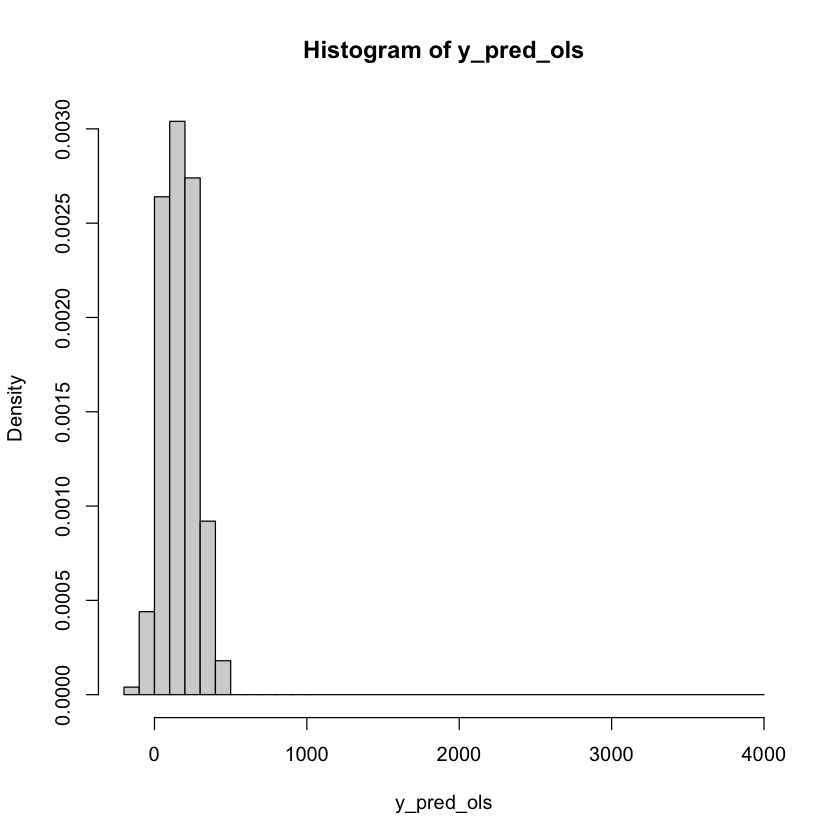

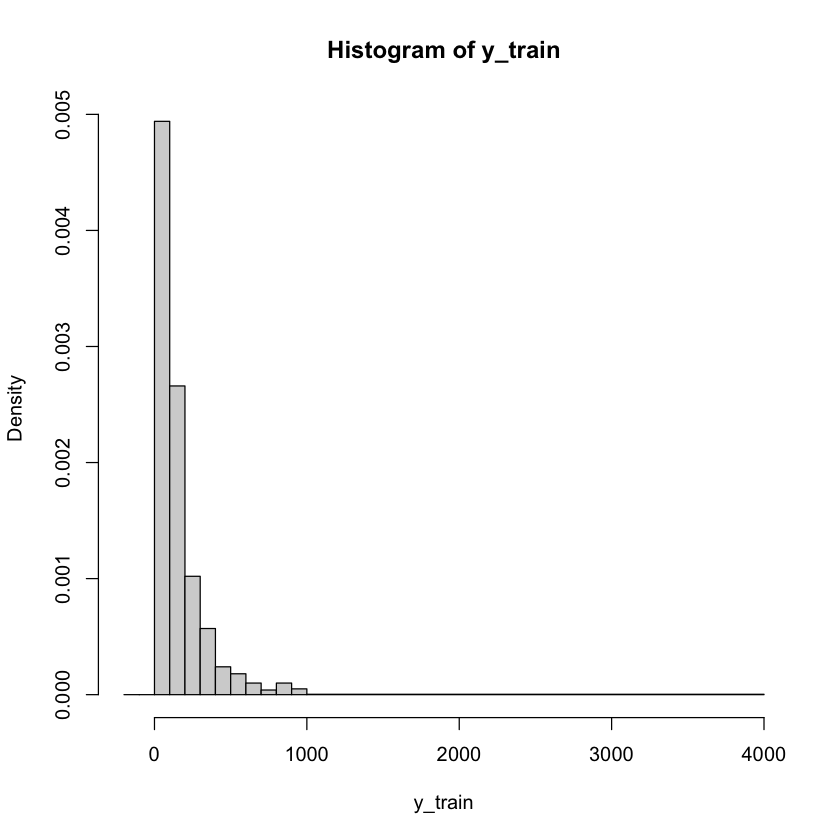

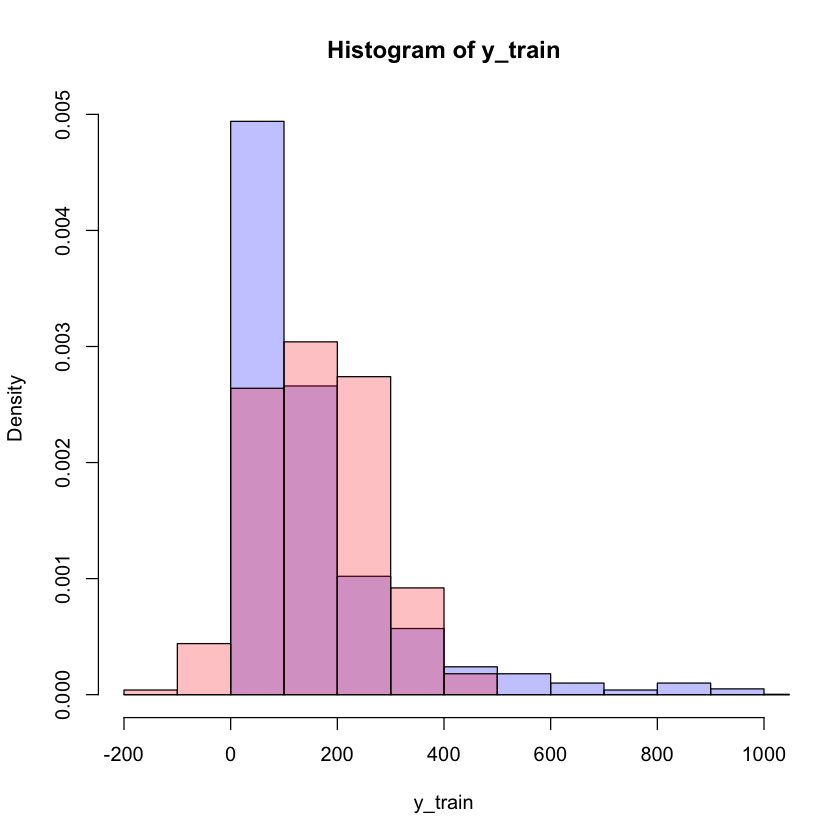

In [459]:
p1 <- hist(y_pred_ols,breaks=c(-200,-100,0,100,200,300,400,500,600,700,800,900,1000,4000))
p2 <- hist(y_train,breaks=c(-200,-100,0,100,200,300,400,500,600,700,800,900,1000,4000))
plot(p2,col=rgb(0,0,1,1/4),xlim=c(-200,1000))
plot(p1,col=rgb(1,0,0,1/4),,xlim=c(-200,1000),add=TRUE)

## -------------------------------------------Question (e)---------------------------------------------------

The covariates that are selected for prediction are household size (-), children indicator (-), livestock (+), self employment (+) and wage employment (+). Some of the widow and elder indicators interactions are selected as well (-).  The distribution of the predicted values coming from the Lasso model is remarkably similar to the distribution of the predicted values coming from the OLS model. The distribution of the Lasso predicted values is not a good approximation of the distributionof the observed values.

In [461]:
m_lasso = rlasso(y=y_train,x=X_train[,-1],all=FALSE)
print(summary(m_lasso))


Call:
rlasso.default(x = X_train[, -1], y = y_train, all = FALSE)

Post-Lasso Estimation:  TRUE 

Total number of variables: 127
Number of selected variables: 9 

Residuals: 
    Min      1Q  Median      3Q     Max 
-312.70  -99.40  -27.23   41.25 2209.62 

                   Estimate
(Intercept)          249.94
bl_hhsize            -23.54
bl_widow               0.00
bl_has_children      -85.56
bl_has_elder           0.00
bl_own_livestock      71.29
bl_own_land            0.00
bl_own_tv_radio        0.00
bl_meals_eaten         0.00
bl_emp_self          110.30
bl_emp_wage          131.70
2bl_widow              0.00
3bl_widow              0.00
4bl_widow              0.00
5bl_widow            -57.66
6bl_widow              0.00
7bl_widow              0.00
8bl_widow              0.00
9bl_widow              0.00
10bl_widow             0.00
11bl_widow             0.00
12bl_widow             0.00
13bl_widow             0.00
14bl_widow             0.00
2bl_has_children       0.00
3bl_has_child

In [462]:
y_pred_lasso = predict(object=m_lasso,new=as.data.frame(X_pred[,-1]))
print(summary(as.matrix(y_pred_lasso)))
print(sd(y_pred))

       V1        
 Min.   :-94.56  
 1st Qu.: 93.76  
 Median :165.05  
 Mean   :165.65  
 3rd Qu.:227.76  
 Max.   :468.40  


ERROR: Error in is.data.frame(x): 'list' object cannot be coerced to type 'double'


In [463]:
summary(as.matrix(y_train))

       V1          
 Min.   :   3.011  
 1st Qu.:  53.795  
 Median : 100.927  
 Mean   : 168.748  
 3rd Qu.: 192.896  
 Max.   :2625.668  

In [464]:
sd(as.matrix(y_train))

[1] 230.2685

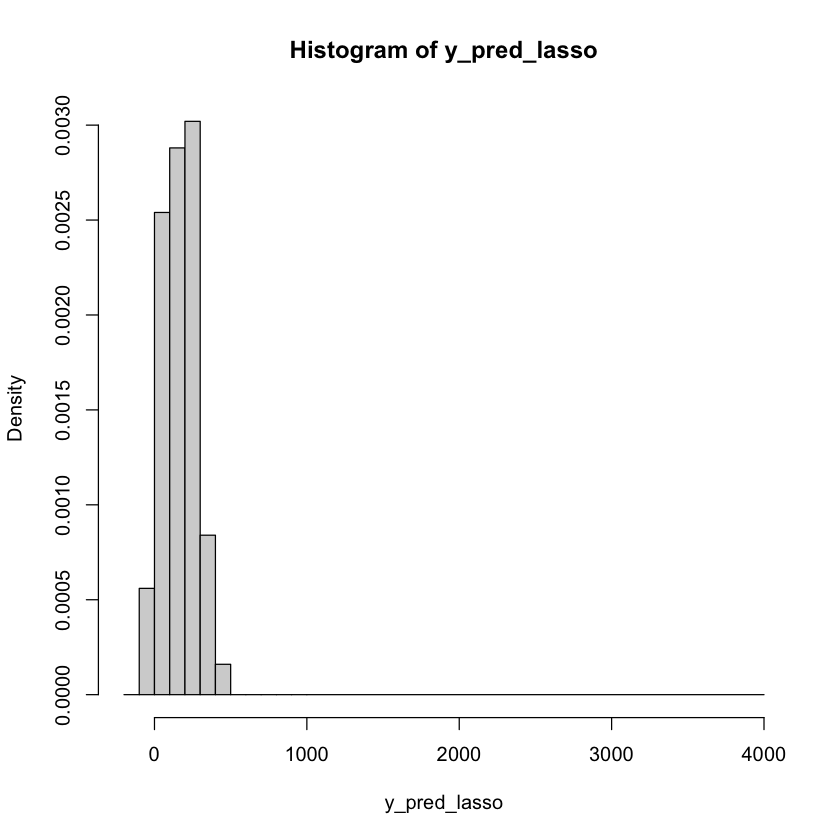

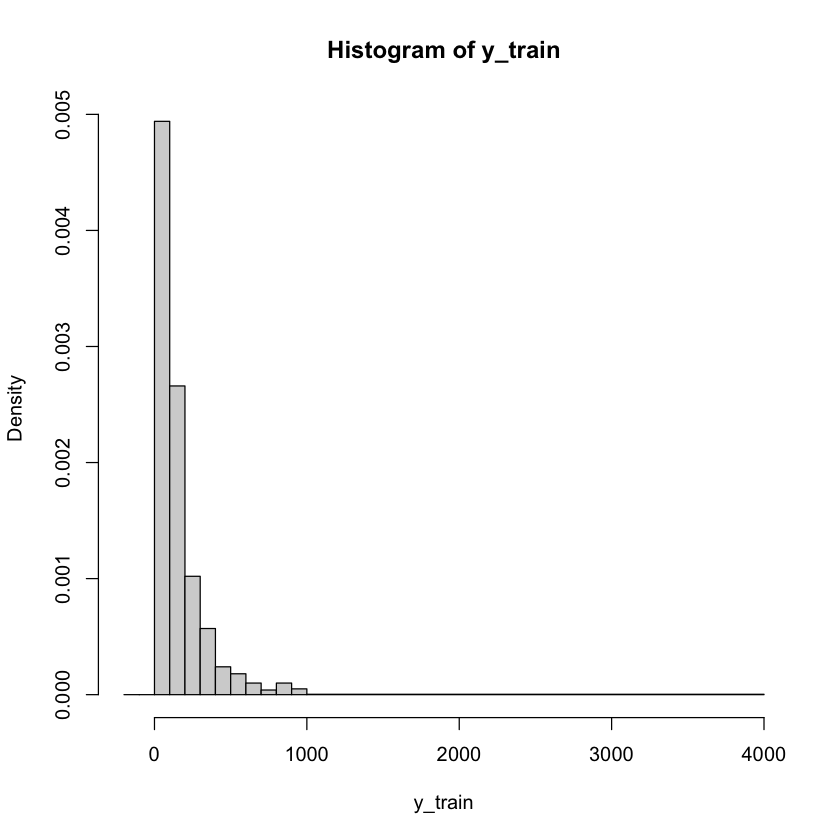

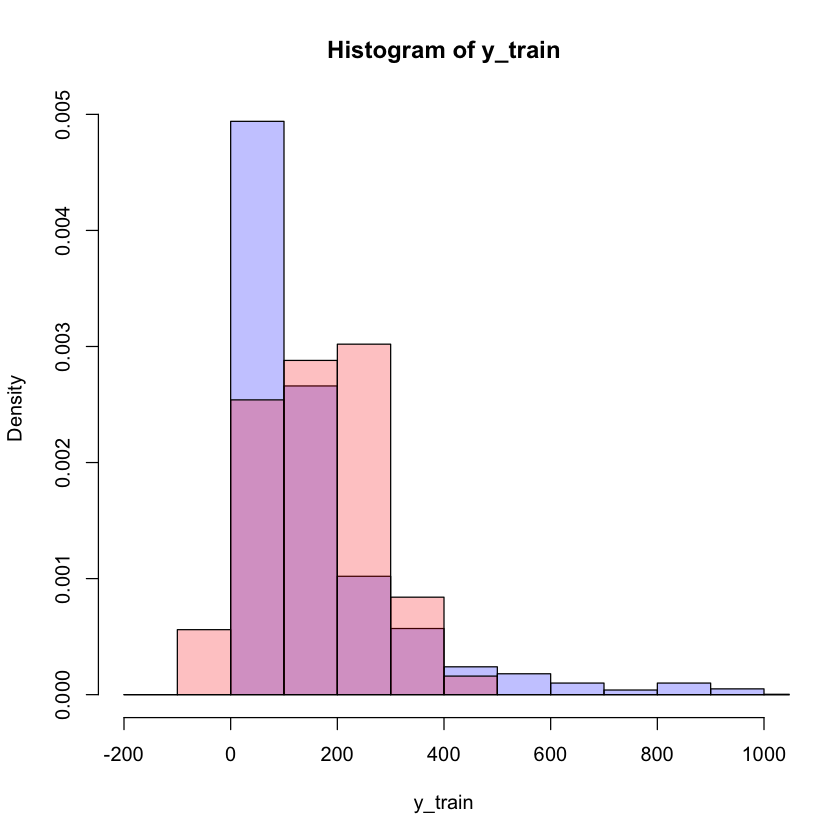

In [465]:
p1 <- hist(y_pred_lasso,breaks=c(-200,-100,0,100,200,300,400,500,600,700,800,900,1000,4000))
p2 <- hist(y_train,breaks=c(-200,-100,0,100,200,300,400,500,600,700,800,900,1000,4000))
plot(p2,col=rgb(0,0,1,1/4),xlim=c(-200,1000))
plot(p1,col=rgb(1,0,0,1/4),,xlim=c(-200,1000),add=TRUE)

## -------------------------------------------Question (f)---------------------------------------------------

We use the grf package by Athey, Wager and Tibshirani to predict baseline income. We employ the following moment condition:  

$$ \mathbb{E}[Y^{bl}_{i}-\theta(x)| x_{i} = x] = 0 \quad \forall x \in \mathbf{X}  $$

where $Y^{bl}_{i}$ is baseline income, $\mathbf{X}$ is our covariate space and $\theta(x)$ is our parameter of interest. We do honest splitting and set the number of trees to 1,000. We also use cross-validation to determine several parameters: the optimal sample fraction to build each tree (sample.fraction), the number of variables considered in each split (mtry), the maximum imbalance of a split (alpha) and the fraction used to determine honest splits (honesty.fraction).

The grf distribution of predicted values is decidedly more similar to the distribution of the oberved values. Contrary to the OLS and Lasso results, the grf does not predict negative values for baseline income. It also shows right skewness, albeit not as pronounced as in the observed distribution. Interstingly, the standard deviation of the grf predictions is smaller than the OLS and Lasso counterparts. The variable importance for the top 20 variables is shown below. The most important features are the original covariates. Household size, the children indicator, wage employment, self employment and livestock are the most important features. Interestingly, widow and elder indicator don't seem to be particularly important. The interaction features seem to be for the most part only marginally important. 

In [466]:
rf <- regression_forest(
    X = as.matrix(X_train[,-1]),
    Y = as.matrix(y_train),
    num.trees =  1000,
    tune.parameters = c("sample.fraction", "mtry", "honesty.fraction", "alpha"),
    compute.oob=TRUE
)
y_pred_grf <- predict(rf, X_pred[,-1], estimate.variance = TRUE)

In [467]:
summary(y_pred_grf[,1])
print(sd(y_pred_grf[,1]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  58.32   95.63  137.89  159.72  215.67  461.46 

[1] 82.63119


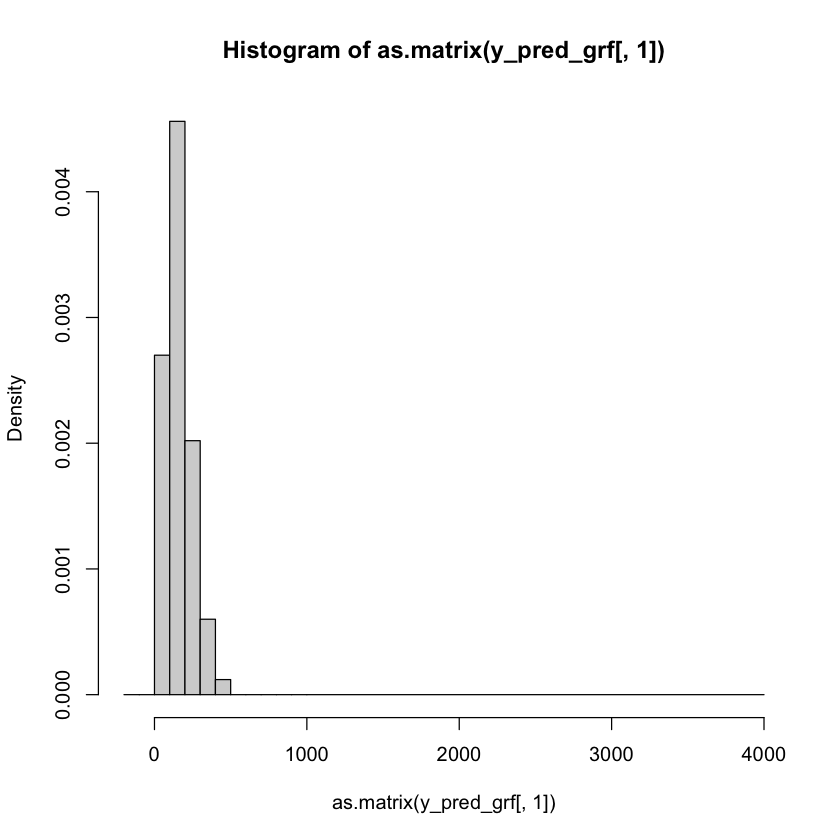

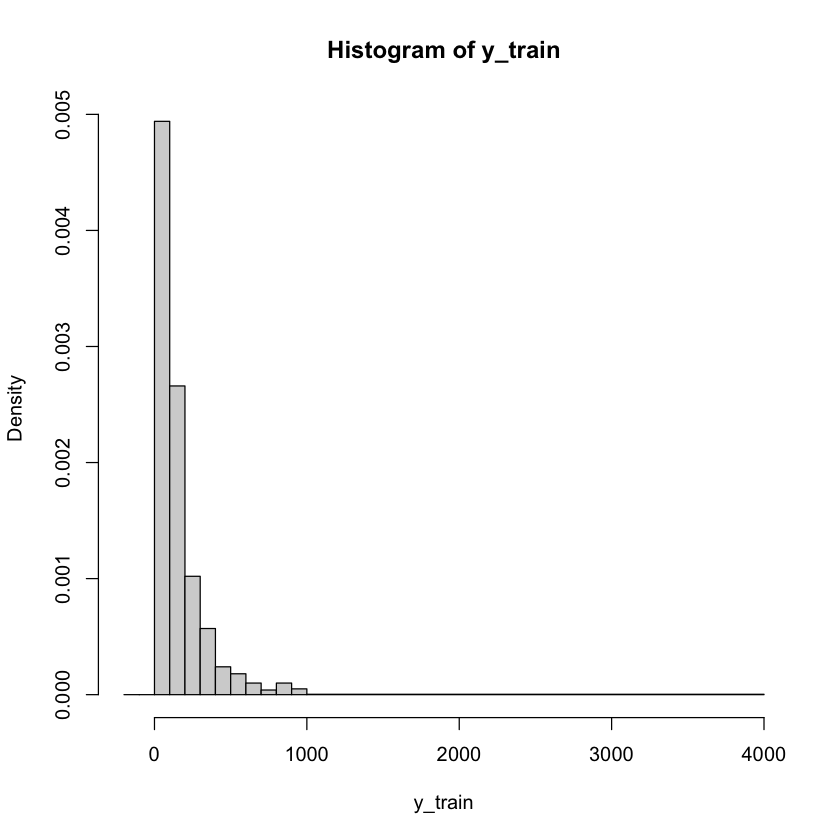

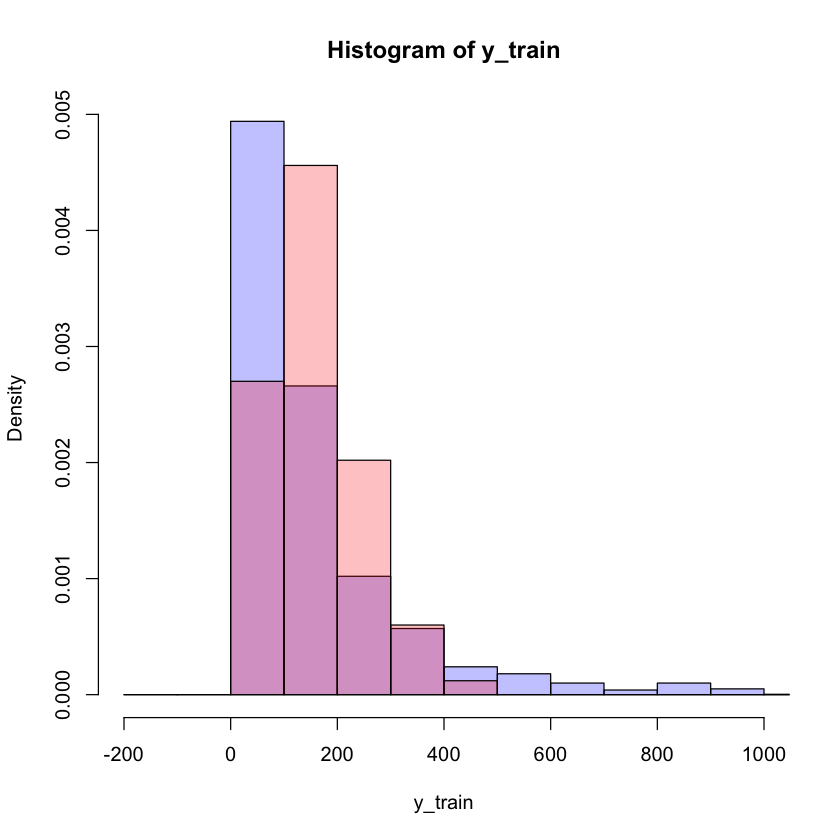

In [468]:
p1 <- hist(as.matrix(y_pred_grf[,1]),breaks=c(-200,-100,0,100,200,300,400,500,600,700,800,900,1000,4000))
p2 <- hist(y_train,breaks=c(-200,-100,0,100,200,300,400,500,600,700,800,900,1000,4000))
plot(p2,col=rgb(0,0,1,1/4),xlim=c(-200,1000))
plot(p1,col=rgb(1,0,0,1/4),,xlim=c(-200,1000),add=TRUE)

In [469]:
var_imp = cbind(colnames(X_train)[-1],as.numeric(variable_importance(rf,)))
var_imp[,2] = as.numeric(var_imp[,2])
var_imp[order(as.numeric(var_imp[,2]),decreasing=TRUE),][0:20,]

bl_hhsize,0.141394841477395
bl_has_children,0.116277739764213
bl_emp_self,0.0864957380396134
bl_emp_wage,0.0781992379037401
bl_own_livestock,0.0483992523671773
2bl_emp_self,0.0465976499605161
2bl_own_livestock,0.0406965456114591
2bl_own_tv_radio,0.0339676248119335
4bl_emp_wage,0.0286166264944003
3bl_emp_self,0.0220037223253905
bl_widow,0.0219925216811822


## -------------------------------------------Question (g)--------------------------------------------------

To a great extent the kernel density analysis corresponds to the histogram analysis I presented in the previous answers. I will add that from the kernel analysis it is evident that all three models have a difficult time in capturing the heterogeneity coming from the few outliers with baseline incomes above \$USD 500. On a related note, all three distributions seem to be slightly biased towards the right.

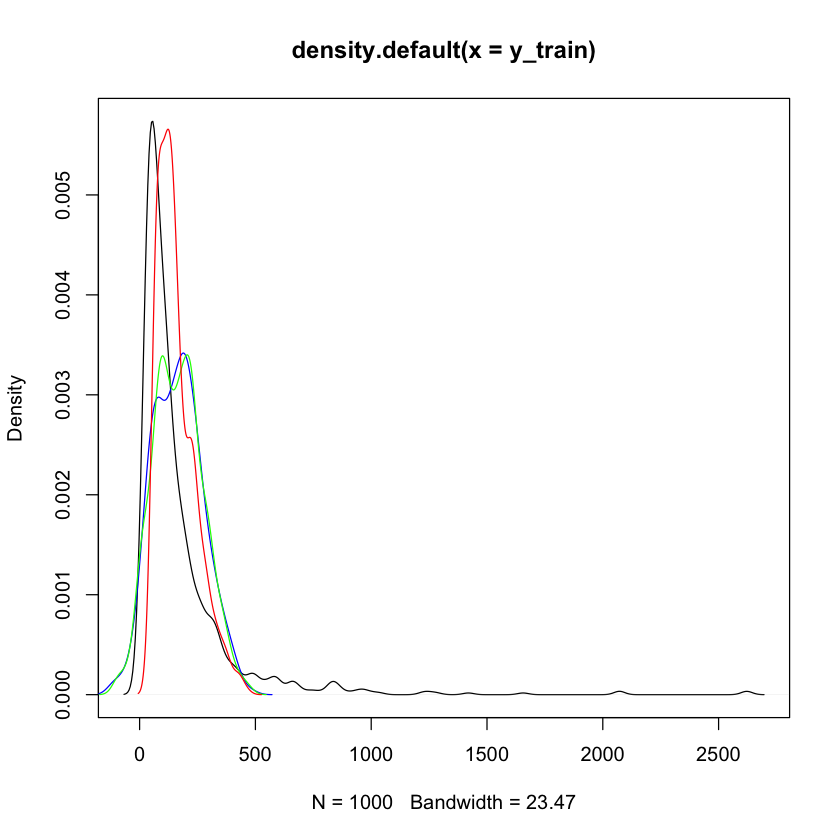

In [485]:
plot(density(y_train))
lines(density(y_pred_ols),col=rgb(0,0,1,1))
lines(density(y_pred_lasso),col=rgb(0,1,0,1))
lines(density(y_pred_grf[,1]),col=rgb(1,0,0,1))

## -------------------------------------------Question (h) -------------------------------------------------

I think that ML methods are likely to be useful in many contexts.

For Part I, even though the estimates didn't change meaningfully, the Lasso procedure adds robustness to the analytical exercise. I feel more confident about the results after validating that they are not the result of an arbitrary choice of covariates by the researcher. Moreover, in a non-experimental setting where confounding is a concern, carrying out this analysis seems even more important. On a more personal note, covariate selection has troubled me in several research projects in the past. I think the papers we review offer a principled way to think about this problem, and so I feel very happy that this material was included in this PS.

As of part II, I believe it is evident how the latest ML methods can be used to improve our estimates of unobserved characteristics. I think it is interesting of this particular setting that we are learning a good deal about the distribution of baseline income with only a thousand observations and almost 130 features. I also think that the grf method is remarkable not only because of its performance but also because of its flexibility. In this PS we limit ourselves to the estimation of the conditional mean function, but we could use grf to estimate conditional average treatment effects or any other parameter that we can describe in a tractable moment condition. 